<a href="https://colab.research.google.com/github/minjaekim070/Bootcamp_Project/blob/main/DSM_%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q fer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!unzip /content/drive/MyDrive/운전자 이상탐지/Validation/[원천]bbox(실제도로환경).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip /content/drive/MyDrive/운전자 이상탐지/Validation/[원천]bbox(실제도로환경).zip'


In [ ]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

#기존 이미지 데이터셋 기준으로 정리

In [ ]:
import os
import glob

folder_path = '/content/drive/MyDrive/운전자 이상탐지/Training/original/bus/R_001_60_M'
extensions = ['jpg']

photo_list = []
for ext in extensions:
    photo_list.extend(glob.glob(os.path.join(folder_path, f'*.{ext}')))


In [ ]:
detector = FER()

In [ ]:
def emotion_analysis(self):
  for i in self:
    result = detector.detect_emotions(self)[0]['emotions']
  return result


In [ ]:
detector.detect_emotions(photo_list[0])[0]['emotions']

{'angry': 0.03,
 'disgust': 0.0,
 'fear': 0.12,
 'happy': 0.11,
 'sad': 0.4,
 'surprise': 0.05,
 'neutral': 0.29}

In [ ]:
detector.detect_emotions(photo_list[16])

[{'box': array([260, 773,  69,  69], dtype=int32),
  'emotions': {'angry': 0.11,
   'disgust': 0.01,
   'fear': 0.3,
   'happy': 0.15,
   'sad': 0.11,
   'surprise': 0.15,
   'neutral': 0.17}},
 {'box': array([187, 647, 324, 324], dtype=int32),
  'emotions': {'angry': 0.02,
   'disgust': 0.0,
   'fear': 0.05,
   'happy': 0.08,
   'sad': 0.3,
   'surprise': 0.22,
   'neutral': 0.33}}]

In [ ]:
len(detector.detect_emotions(photo_list[16]))

2

In [ ]:
emotion_analysis(photo_list[16])

{'angry': 0.11,
 'disgust': 0.01,
 'fear': 0.3,
 'happy': 0.15,
 'sad': 0.11,
 'surprise': 0.15,
 'neutral': 0.17}

In [ ]:
emotions_analysis_result = []
for i in range(0,20):
  photo = photo_list[i]
  if len(detector.detect_emotions(photo)) >= 1:  #emotion detection 결과가 없거나 2개 이상인 경우도 있어서 하나로 제한
    emotions_analysis_result.append(emotion_analysis(photo))
    print(emotion_analysis(photo))

{'angry': 0.03, 'disgust': 0.0, 'fear': 0.12, 'happy': 0.11, 'sad': 0.4, 'surprise': 0.05, 'neutral': 0.29}
{'angry': 0.02, 'disgust': 0.0, 'fear': 0.15, 'happy': 0.5, 'sad': 0.21, 'surprise': 0.03, 'neutral': 0.09}
{'angry': 0.08, 'disgust': 0.0, 'fear': 0.28, 'happy': 0.05, 'sad': 0.28, 'surprise': 0.1, 'neutral': 0.2}
{'angry': 0.09, 'disgust': 0.02, 'fear': 0.22, 'happy': 0.06, 'sad': 0.43, 'surprise': 0.04, 'neutral': 0.15}
{'angry': 0.08, 'disgust': 0.0, 'fear': 0.39, 'happy': 0.14, 'sad': 0.32, 'surprise': 0.01, 'neutral': 0.04}
{'angry': 0.06, 'disgust': 0.0, 'fear': 0.15, 'happy': 0.2, 'sad': 0.38, 'surprise': 0.04, 'neutral': 0.16}
{'angry': 0.02, 'disgust': 0.0, 'fear': 0.21, 'happy': 0.28, 'sad': 0.31, 'surprise': 0.07, 'neutral': 0.1}
{'angry': 0.63, 'disgust': 0.0, 'fear': 0.13, 'happy': 0.05, 'sad': 0.15, 'surprise': 0.0, 'neutral': 0.04}
{'angry': 0.47, 'disgust': 0.0, 'fear': 0.25, 'happy': 0.02, 'sad': 0.16, 'surprise': 0.0, 'neutral': 0.1}
{'angry': 0.08, 'disgust': 

In [ ]:
# 각각의 감정에 해당하는 확률 값을 따로 모으는 딕셔너리
emotions_by_type = {
    'happy': [],
    'sad': [],
    'surprise': [],
    'neutral': [],
}

# 결과값을 종류별로 모으기
for result in emotions_analysis_result:
    happy = round(sum(result.get(emotion, 0) for emotion in ['happy']), 3)
    sad = round(sum(result.get(emotion, 0) for emotion in ['sad', 'disgust']), 3)
    surprise = round(sum(result.get(emotion, 0) for emotion in ['surprise', 'angry', 'fear']), 3)
    neutral = round(sum(result.get(emotion, 0) for emotion in ['neutral']), 3)

    emotions_by_type['happy'].append(happy)
    emotions_by_type['sad'].append(sad)
    emotions_by_type['surprise'].append(surprise)
    emotions_by_type['neutral'].append(neutral)

# 결과 출력
for emotion, prob_list in emotions_by_type.items():
    print(f"{emotion}: {prob_list}")


happy: [0.11, 0.5, 0.05, 0.06, 0.14, 0.2, 0.28, 0.05, 0.02, 0.2, 0.11, 0.11, 0.13, 0.08, 0.15, 0.15, 0.06, 0.05]
sad: [0.4, 0.21, 0.28, 0.45, 0.32, 0.38, 0.31, 0.15, 0.16, 0.24, 0.12, 0.11, 0.07, 0.23, 0.31, 0.12, 0.58, 0.51]
surprise: [0.2, 0.2, 0.46, 0.35, 0.48, 0.25, 0.3, 0.76, 0.72, 0.42, 0.58, 0.64, 0.61, 0.5, 0.47, 0.56, 0.22, 0.13]
neutral: [0.29, 0.09, 0.2, 0.15, 0.04, 0.16, 0.1, 0.04, 0.1, 0.13, 0.2, 0.14, 0.19, 0.19, 0.07, 0.17, 0.14, 0.3]


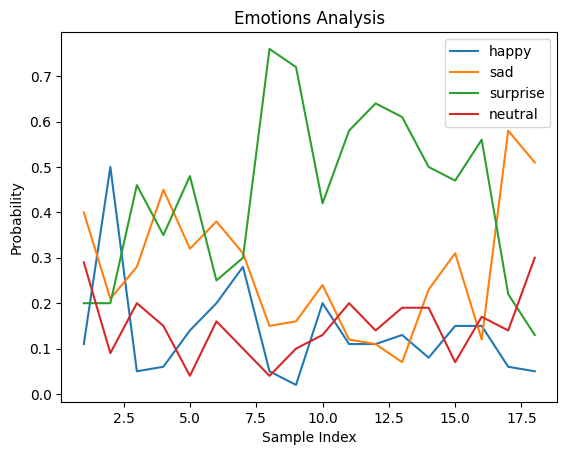

In [ ]:
import matplotlib.pyplot as plt
# 그래프로 시각화
for emotion, prob_list in emotions_by_type.items():
    plt.plot(range(1, len(prob_list) + 1), prob_list, label=emotion)

plt.xlabel('Sample Index')
plt.ylabel('Probability')
plt.title('Emotions Analysis')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# 연속적으로 감지되는 횟수를 세는 변수 초기화
consecutive_detection_count = {
    'happy': 0,
    'sad': 0,
    'surprise': 0,
    'neutral': 0,
}

# 임계값 설정
threshold = 0.6
continuous_threshold = 0.4
continuous_frames = 3  # 연속으로 감지되어야 하는 프레임 수

# 결과 출력
for i, result in enumerate(emotions_analysis_result):
    # 감정별로 확률 값 추출
    happy = round(sum(result.get(emotion, 0) for emotion in ['happy']), 3)
    sad = round(sum(result.get(emotion, 0) for emotion in ['sad', 'disgust']), 3)
    surprise = round(sum(result.get(emotion, 0) for emotion in ['surprise', 'angry', 'fear']), 3)
    neutral = round(sum(result.get(emotion, 0) for emotion in ['neutral']), 3)

    # 감정별 확률 값을 딕셔너리에 추가
    emotions_by_type['happy'].append(happy)
    emotions_by_type['sad'].append(sad)
    emotions_by_type['surprise'].append(surprise)
    emotions_by_type['neutral'].append(neutral)

    # 0.6 이상인 감정 출력
    for emotion, prob in [('happy', happy), ('sad', sad), ('surprise', surprise), ('neutral', neutral)]:
        if prob >= threshold:
            print(f"Frame {i}: High {emotion} detected! Probability: {prob}")

        # 연속적으로 0.4 이상인 감정 검사
        if prob >= continuous_threshold:
            consecutive_detection_count[emotion] += 1
        else:
            consecutive_detection_count[emotion] = 0

        # 연속적으로 감지된 횟수가 연속 프레임 수를 충족하면 출력
        if consecutive_detection_count[emotion] >= continuous_frames:
            print(f"Frame {i}: Continuous {emotion} detected ({continuous_frames} frames)!")


Frame 7: High surprise detected! Probability: 0.76
Frame 8: High surprise detected! Probability: 0.72
Frame 9: Continuous surprise detected (3 frames)!
Frame 10: Continuous surprise detected (3 frames)!
Frame 11: High surprise detected! Probability: 0.64
Frame 11: Continuous surprise detected (3 frames)!
Frame 12: High surprise detected! Probability: 0.61
Frame 12: Continuous surprise detected (3 frames)!
Frame 13: Continuous surprise detected (3 frames)!
Frame 14: Continuous surprise detected (3 frames)!
Frame 15: Continuous surprise detected (3 frames)!


#동영상 기준으로 감정

In [ ]:
detector = FER()

In [ ]:
print(dir(detector))

['_FER__apply_offsets', '_FER__emotion_classifier', '_FER__emotion_target_size', '_FER__face_detector', '_FER__min_face_size', '_FER__min_neighbors', '_FER__offsets', '_FER__preprocess_input', '_FER__scale_factor', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_classify_emotions', '_get_labels', '_initialize_model', 'depad', 'detect_emotions', 'find_faces', 'pad', 'tfserving', 'top_emotion', 'tosquare']


In [ ]:
videofile_location = 'sample.mp4'
#얼굴 인식
face_detector = FER(mtcnn = True)
#비디오 처리 입력값 설정
input_video = Video(videofile_location)

In [ ]:
processing_data = input_video.analyze(face_detector, display = False)

In [ ]:
# to_pandas 메서드로 DataFrame으로 변환
vid_df = input_video.to_pandas(processing_data)

# get_first_face 메서드를 통해 각 프레임의 첫 번째 얼굴 데이터를 가져와 DataFrame에 추가
vid_df = input_video.get_first_face(vid_df)

# get_emotions 메서드를 통해 얼굴 감정 데이터를 가져와 DataFrame에 추가
vid_df = input_video.get_emotions(vid_df)

In [ ]:
import matplotlib.pyplot as plt
# 시각화
pltfig = vid_df.plot(figsize=(20, 8))
plt.show()